Dataset Shape: (200, 5)
Missing Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Summary Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


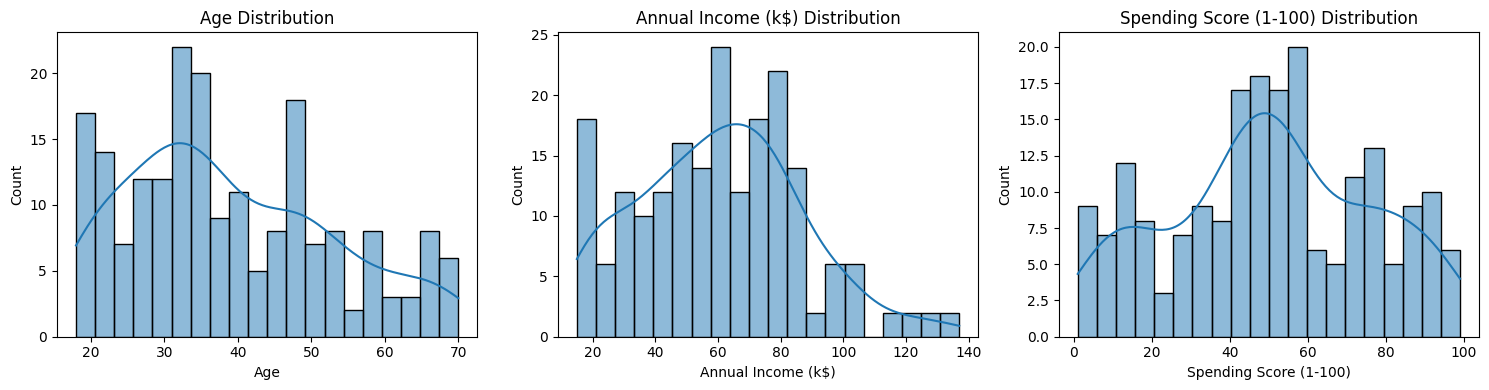

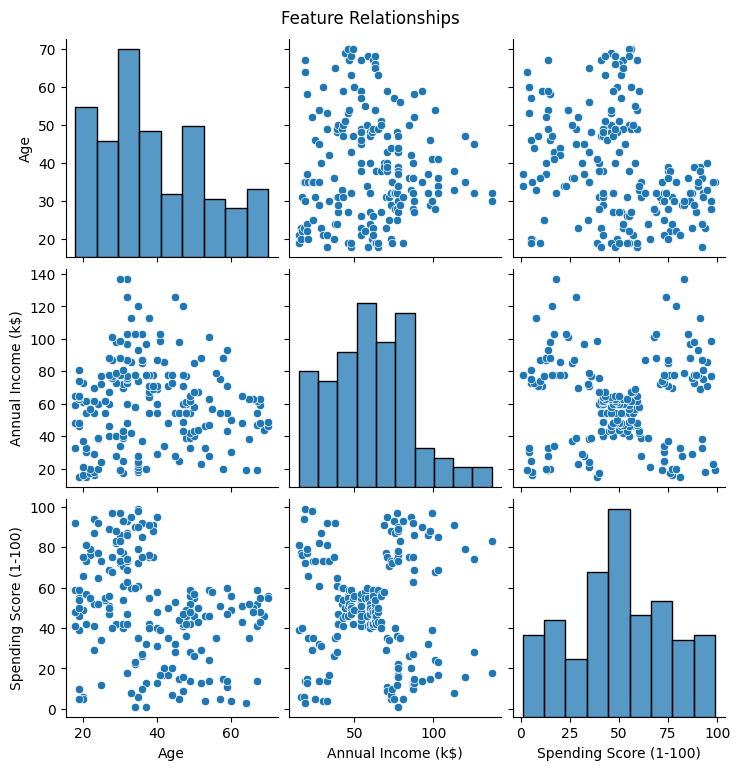

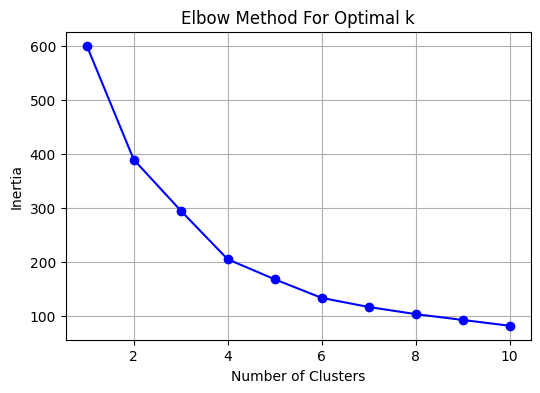

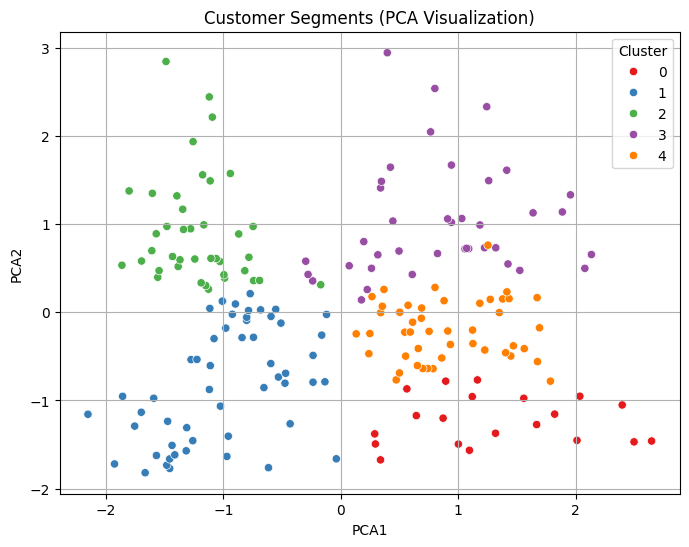

Cluster Averages:
            Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        46.25               26.75                   18.35
1        25.19               41.09                   62.24
2        32.88               86.10                   81.53
3        39.87               86.10                   19.36
4        55.64               54.38                   48.85

--- Marketing Strategies per Cluster ---
Cluster 0: Older customers with average income and moderate spending.
→ Suggest loyalty programs and age-friendly services.
Cluster 1: High-income, high-spending young adults.
→ Suggest luxury product campaigns and VIP membership promotions.
Cluster 2: Young low-income but moderate spenders.
→ Suggest budget-friendly trendy products and student discounts.
Cluster 3: Low-income, low-spending middle-aged users.
→ Suggest basic packages and essential product bundles.
Cluster 4: High-income, low-spending customers.
→ Suggest

In [16]:
# Customer Segmentation with K-Means and PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# ------------------- 1. EDA -------------------

print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Summary Statistics:\n", df.describe())

# Histograms
plt.figure(figsize=(15, 4))
for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# ------------------- 2. K-Means Clustering -------------------

# Select features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# From Elbow, choose k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ------------------- 3. PCA Visualization -------------------

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Customer Segments (PCA Visualization)')
plt.grid(True)
plt.show()

# ------------------- 4. Cluster Summary -------------------

summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print("Cluster Averages:\n", summary)

# ------------------- 5. Strategy Suggestions -------------------

strategies = {
    0: "Cluster 0: Older customers with average income and moderate spending.\n→ Suggest loyalty programs and age-friendly services.",
    1: "Cluster 1: High-income, high-spending young adults.\n→ Suggest luxury product campaigns and VIP membership promotions.",
    2: "Cluster 2: Young low-income but moderate spenders.\n→ Suggest budget-friendly trendy products and student discounts.",
    3: "Cluster 3: Low-income, low-spending middle-aged users.\n→ Suggest basic packages and essential product bundles.",
    4: "Cluster 4: High-income, low-spending customers.\n→ Suggest high-quality, value-focused product pitches and long-term savings offers."
}

print("\n--- Marketing Strategies per Cluster ---")
for c in range(5):
    print(strategies[c])


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
C:\Users\HP\AppData\Local\Temp\ipykernel_1144\372681182.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_1144\372681182.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundatio

ARIMA - MAE: 0.649, RMSE: 0.793
Prophet - MAE: 0.773, RMSE: 0.993


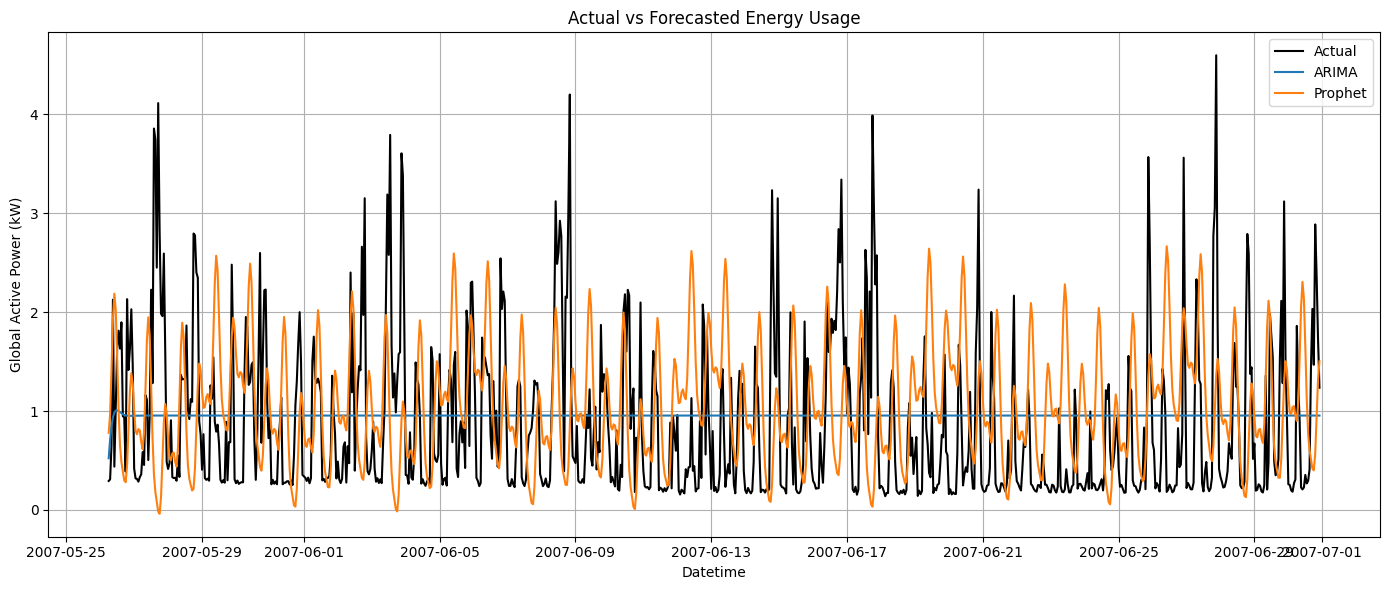

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Load dataset
df = pd.read_csv('household_power_consumption.csv', sep=',', na_values='?', low_memory=False)
df.columns = df.columns.str.strip()
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
df = df[['Datetime', 'Global_active_power']].dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)

# Resample hourly
df.set_index('Datetime', inplace=True)
df_hourly = df.resample('H').mean()

# Feature Engineering
df_hourly['hour'] = df_hourly.index.hour
df_hourly['dayofweek'] = df_hourly.index.dayofweek
df_hourly['is_weekend'] = df_hourly['dayofweek'] >= 5
df_hourly['target'] = df_hourly['Global_active_power'].shift(-1)
df_features = df_hourly.dropna()

# Train/test split
split = int(len(df_features) * 0.8)
train = df_features.iloc[:split]
test = df_features.iloc[split:]

# ---------------- ARIMA ----------------
arima_model = ARIMA(train['Global_active_power'], order=(2,1,2)).fit()
arima_forecast = arima_model.forecast(steps=len(test))

# ---------------- Prophet ----------------
df_prophet = df_hourly[['Global_active_power']].reset_index().rename(columns={'Datetime': 'ds', 'Global_active_power': 'y'})
prophet = Prophet(daily_seasonality=True)
prophet.fit(df_prophet.iloc[:split])
future = prophet.make_future_dataframe(periods=len(test), freq='H')
forecast = prophet.predict(future)
prophet_pred = forecast.iloc[-len(test):]['yhat'].values

# ---------------- Evaluation ----------------
def evaluate(true, pred, name):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    print(f"{name} - MAE: {mae:.3f}, RMSE: {rmse:.3f}")

evaluate(test['Global_active_power'], arima_forecast, "ARIMA")
evaluate(test['Global_active_power'], prophet_pred, "Prophet")

# ---------------- Plot ----------------
plt.figure(figsize=(14, 6))
plt.plot(test.index, test['Global_active_power'], label='Actual', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA')
plt.plot(test.index, prophet_pred, label='Prophet')
plt.title("Actual vs Forecasted Energy Usage")
plt.xlabel("Datetime")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [21]:
import streamlit as st
import pandas as pd

# Load and clean data
@st.cache_data
def load_data():
    df = pd.read_excel("Global_Superstore2.xlsx", sheet_name="Sheet1")
    df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
    df = df.dropna(subset=['Sales', 'Profit', 'Customer Name', 'Region', 'Category', 'Sub-Category'])
    return df

df = load_data()

# Sidebar filters
st.sidebar.title("Filters")
region = st.sidebar.selectbox("Region", options=df['Region'].unique())
category = st.sidebar.selectbox("Category", options=df['Category'].unique())
subcat = st.sidebar.selectbox("Sub-Category", options=df['Sub-Category'].unique())

filtered = df[
    (df['Region'] == region) &
    (df['Category'] == category) &
    (df['Sub-Category'] == subcat)
]

# KPIs
st.title(" Superstore Dashboard")
st.metric("Total Sales", f"${filtered['Sales'].sum():,.2f}")
st.metric("Total Profit", f"${filtered['Profit'].sum():,.2f}")

# Top customers
top_customers = (
    filtered.groupby('Customer Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

st.subheader(" Top 5 Customers by Sales")
st.dataframe(top_customers)

# Optional bar chart
st.bar_chart(top_customers.set_index('Customer Name'))


2025-07-28 22:00:08.697 No runtime found, using MemoryCacheStorageManager
2025-07-28 22:00:08.701 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 22:00:08.703 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 22:00:08.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 22:00:08.707 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 22:00:09.224 Thread 'Thread-11': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 22:00:09.243 Thread 'Thread-11': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 22:00:09.246 Thread 'Thread-11': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 22:00:28.401 Thread 'MainThread': mi

DeltaGenerator()

Optimal Threshold: 0.56
Minimum Business Cost: $381100

 Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     45216
           1       1.00      0.00      0.00      3814

    accuracy                           0.92     49030
   macro avg       0.96      0.50      0.48     49030
weighted avg       0.93      0.92      0.89     49030

ROC AUC Score: 0.7434636474051164


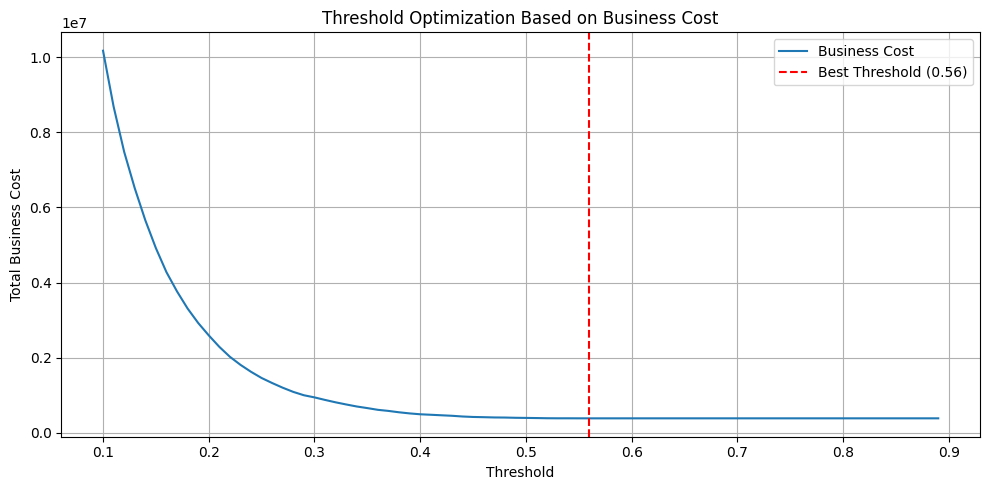

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# STEP 1: Load dataset (update filename if different)
df = pd.read_csv("application_train.csv")

# STEP 2: Basic preprocessing
# Drop columns with more than 30% missing values
df = df.dropna(thresh=0.7 * len(df), axis=1)

# Drop non-numeric columns
df = df.select_dtypes(include=[np.number])

# Drop rows with any remaining NaNs
df = df.dropna()

# STEP 3: Define features and target
X = df.drop(columns=["TARGET"])
y = df["TARGET"]

# STEP 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# STEP 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 6: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# STEP 7: Define business cost function
cost_fp = 1000  # Cost of approving a risky customer (False Positive)
cost_fn = 100   # Cost of rejecting a good customer (False Negative)

thresholds = np.arange(0.1, 0.9, 0.01)
costs = []

for t in thresholds:
    preds = (y_probs >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    total_cost = fp * cost_fp + fn * cost_fn
    costs.append((t, total_cost))

# Find best threshold
best_threshold, min_cost = min(costs, key=lambda x: x[1])
print(f"Optimal Threshold: {best_threshold:.2f}")
print(f"Minimum Business Cost: ${min_cost}")

# STEP 8: Evaluate model at optimal threshold
final_preds = (y_probs >= best_threshold).astype(int)

print("\n Classification Report:")
print(classification_report(y_test, final_preds))

print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

# STEP 9: Plot cost vs threshold
plt.figure(figsize=(10, 5))
plt.plot([t for t, c in costs], [c for t, c in costs], label="Business Cost")
plt.axvline(best_threshold, color="red", linestyle="--", label=f"Best Threshold ({best_threshold:.2f})")
plt.xlabel("Threshold")
plt.ylabel("Total Business Cost")
plt.title("Threshold Optimization Based on Business Cost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
